**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score, explained_variance_score

In [2]:
sns.set_theme()

**Importing Dataset**

In [3]:
df = pd.read_excel('Concrete Compressive Strength/Concrete_Data.xls')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


# **Exploring Dataset**

1.Count of Null values

2.Shape of dataset

3.Uniques values

4.Drop Duplicates

1. Count of Null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
data = df

In [6]:
has_nan = data.isna().any().any()
if has_nan:
    print("The DataFrame contains NaN values.")
else:
    print("The DataFrame does not contain any NaN values.")

The DataFrame does not contain any NaN values.


2. Shape of the Dataset

In [7]:
data.shape

(1030, 9)

3. Uniques values

Verifying whether there are columns containing only one unique value, as they will have no impact on our analysis.

In [8]:
# No unique values found

In [9]:
data.nunique(dropna=True)

Cement (component 1)(kg in a m^3 mixture)                280
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    187
Fly Ash (component 3)(kg in a m^3 mixture)               163
Water  (component 4)(kg in a m^3 mixture)                205
Superplasticizer (component 5)(kg in a m^3 mixture)      155
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     284
Fine Aggregate (component 7)(kg in a m^3 mixture)        304
Age (day)                                                 14
Concrete compressive strength(MPa, megapascals)          938
dtype: int64

In [10]:
data.shape

(1030, 9)

4. Drop Duplicates

In [11]:
data=data.drop_duplicates()
data.shape

(1005, 9)

# **Statistics of Dataset**

## 1. *Descriptive statistics*

Summarizing the distribution of the numerical variables.

In [12]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


## 2. Unique Value Count from each Column:

In [13]:
for col in df.columns:
    print(f'{col} : {len(set(df[col]))}')

Cement (component 1)(kg in a m^3 mixture) : 280
Blast Furnace Slag (component 2)(kg in a m^3 mixture) : 187
Fly Ash (component 3)(kg in a m^3 mixture) : 163
Water  (component 4)(kg in a m^3 mixture) : 205
Superplasticizer (component 5)(kg in a m^3 mixture) : 155
Coarse Aggregate  (component 6)(kg in a m^3 mixture) : 284
Fine Aggregate (component 7)(kg in a m^3 mixture) : 304
Age (day) : 14
Concrete compressive strength(MPa, megapascals)  : 938


# Data Preprocessing (Preparing Dataset)

# 1.Replace Large Column Values

In [14]:
df.columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength']
data=df
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# **Data Visualization**

# 1. Distribution of independent variables

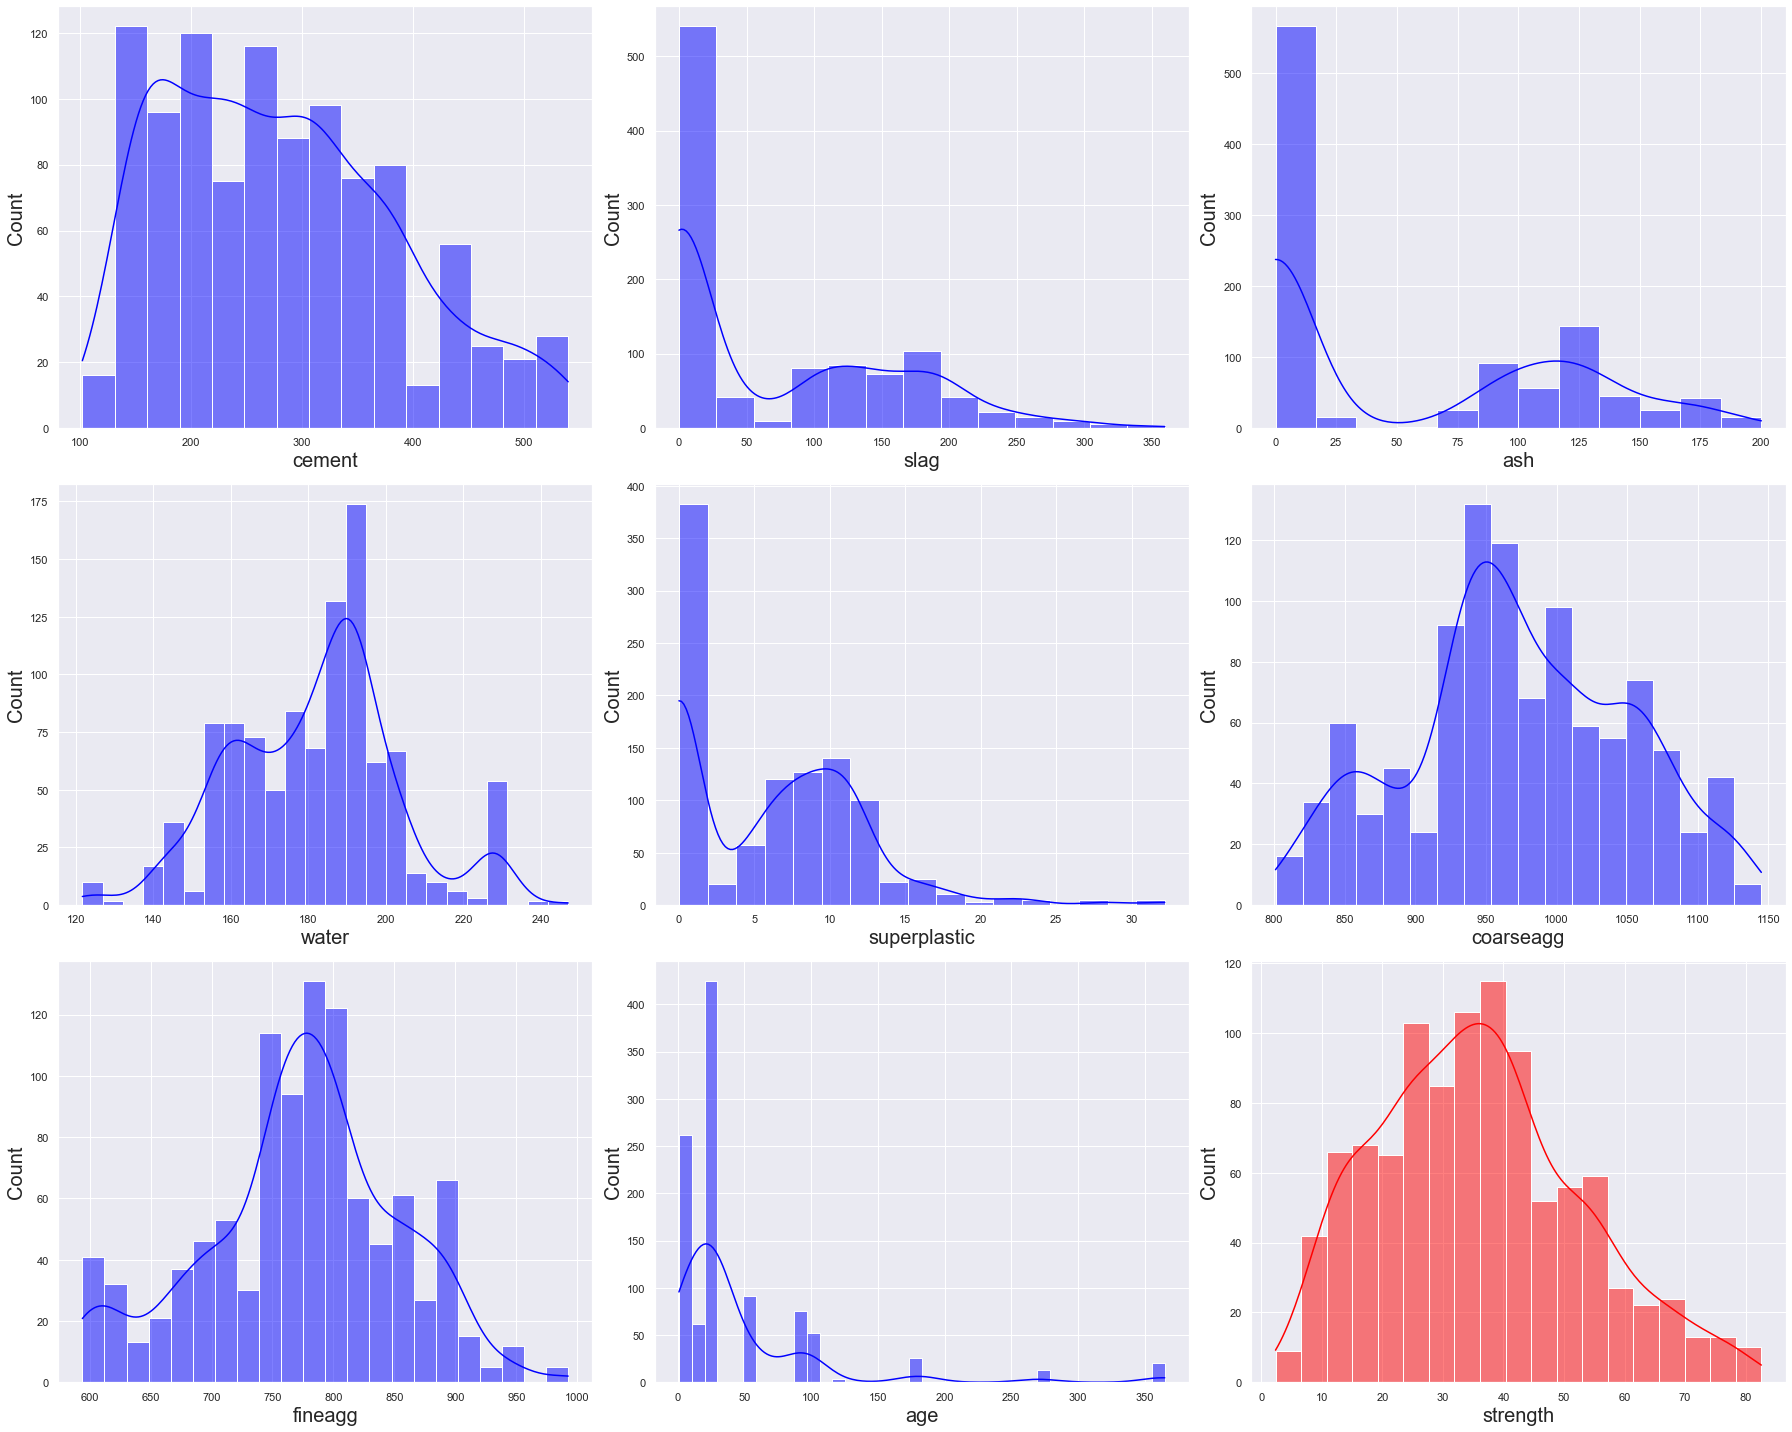

In [15]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        if plotnumber==9:
            sns.histplot(df[col],kde=True, color="red")
        else:
            sns.histplot(df[col],kde=True, color="blue")
        plt.xlabel(col, fontsize = 20)
        plt.ylabel("Count", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# 2. box plot of independent Variables

In [16]:
data = df

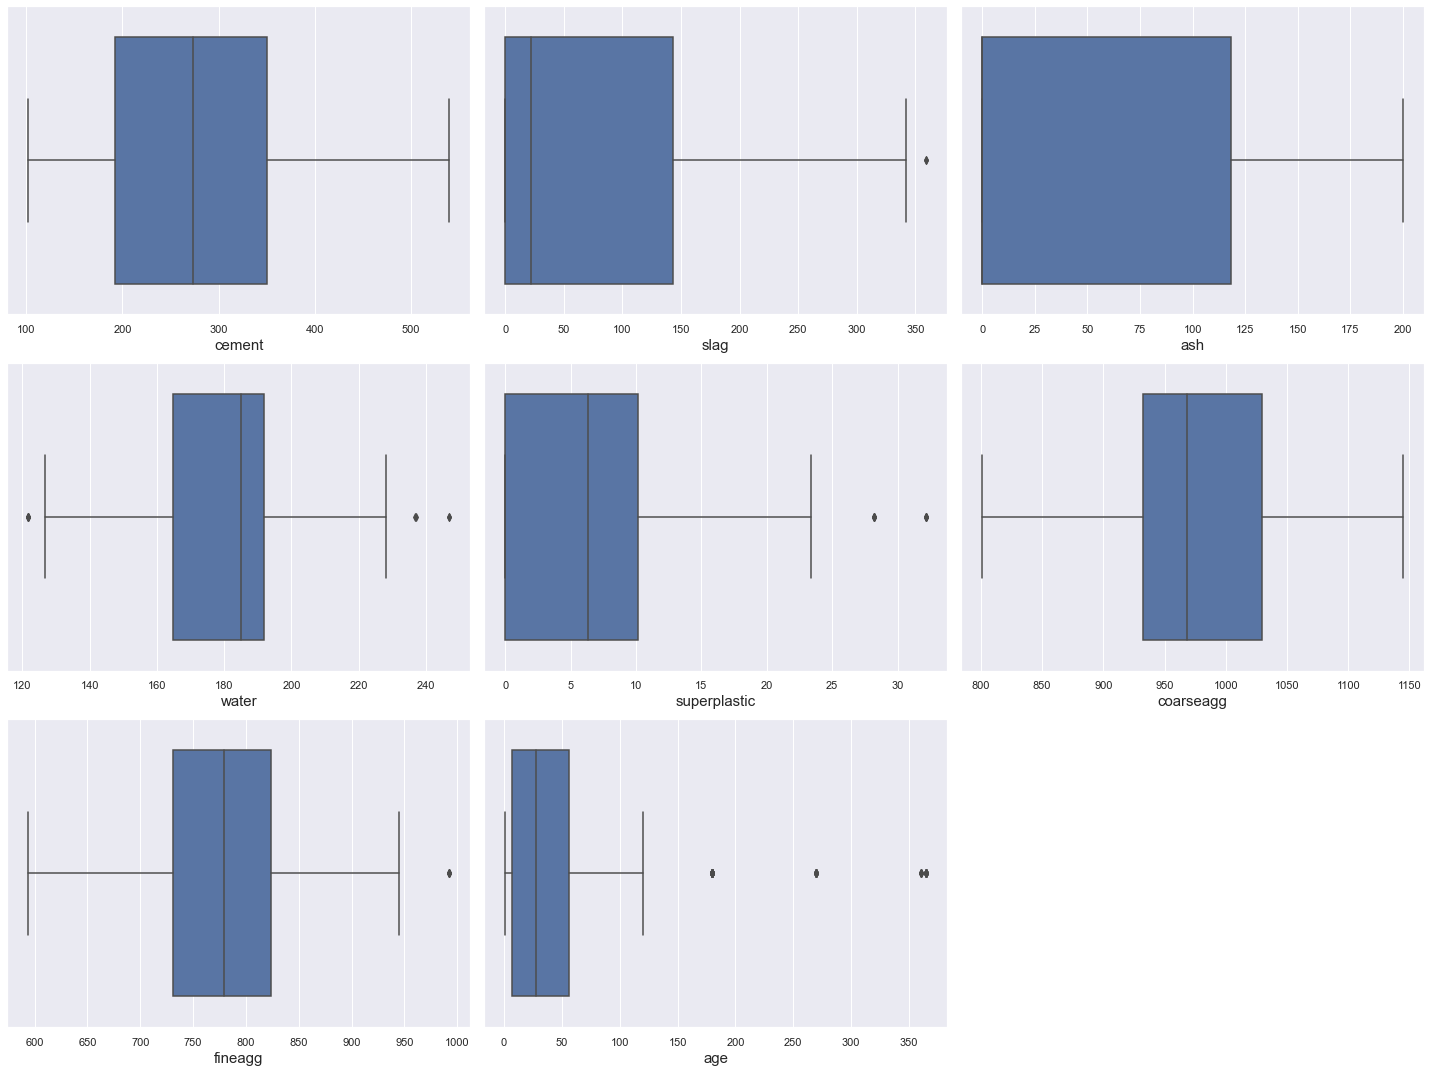

In [17]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

## 3. Combined Boxplot:

[Text(0, 0, 'cement'),
 Text(1, 0, 'slag'),
 Text(2, 0, 'ash'),
 Text(3, 0, 'water'),
 Text(4, 0, 'superplastic'),
 Text(5, 0, 'coarseagg'),
 Text(6, 0, 'fineagg'),
 Text(7, 0, 'age'),
 Text(8, 0, 'strength')]

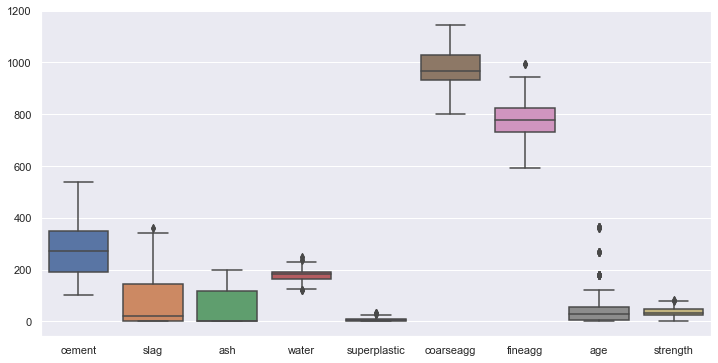

In [18]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels())

## 4. PairGrid  :

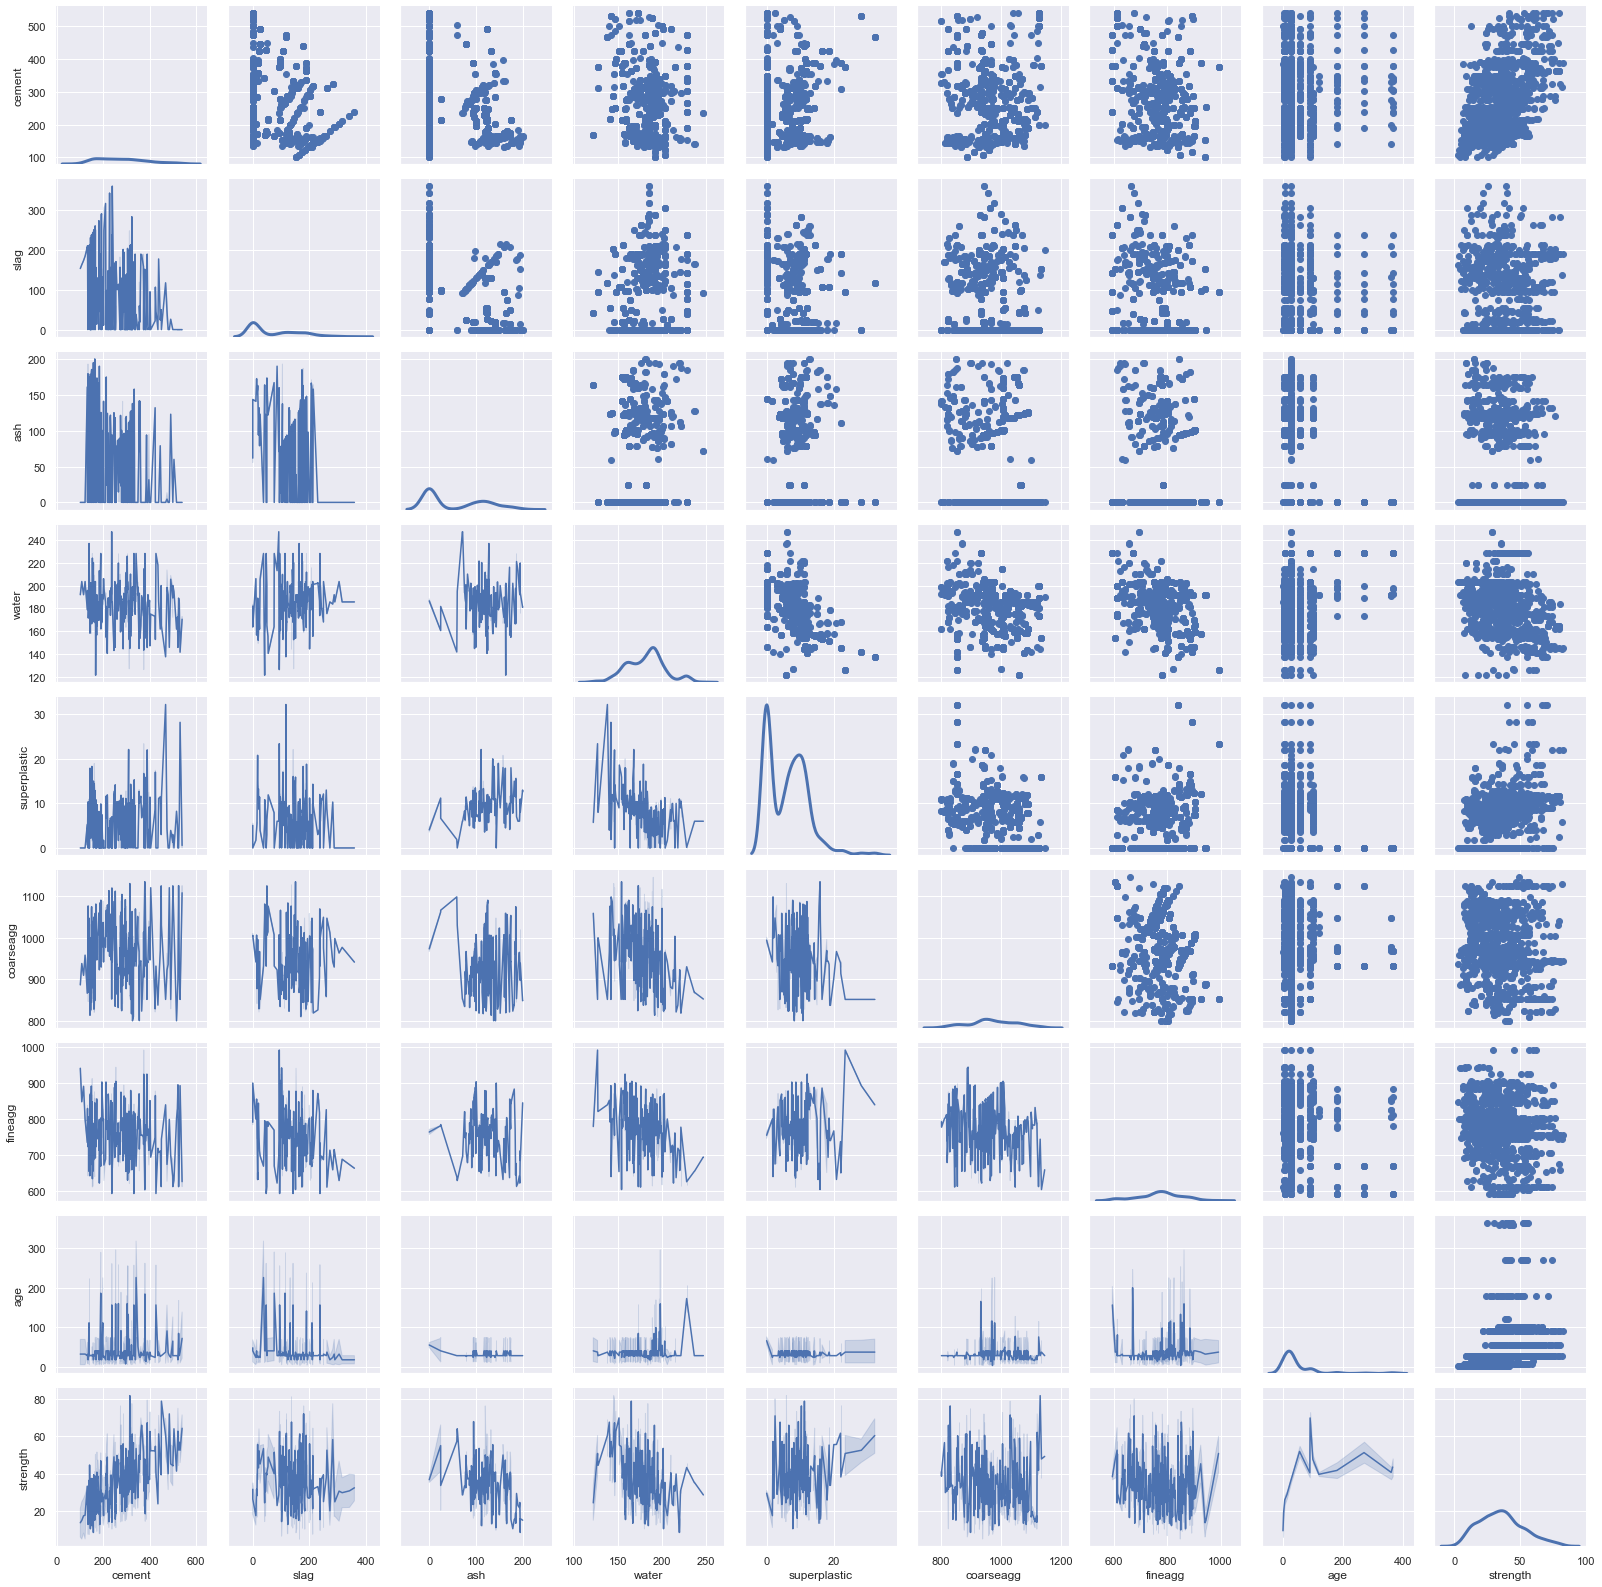

In [19]:
g = sns.PairGrid(data)
g.map_upper(plt.scatter)
g.map_lower(sns.lineplot)
g.map_diag(sns.kdeplot, lw=3, legend=True);

## 5. Heat map

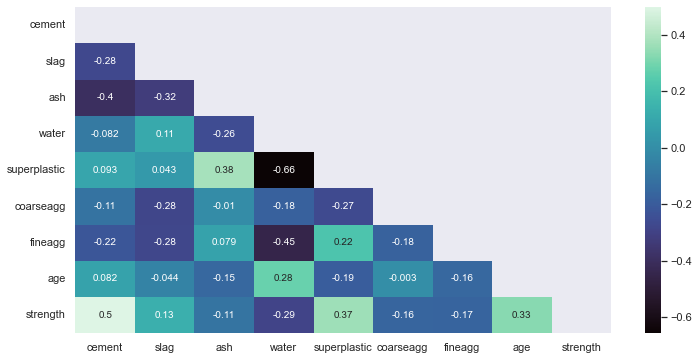

In [20]:
plt.subplots(figsize=(12, 6))
corr = data.corr()
ax = sns.heatmap(data=corr, cmap='mako', annot=True, mask=np.triu(np.ones_like(corr, dtype = bool)))

## 6. Scatter plot b/w strength vs independent Variables

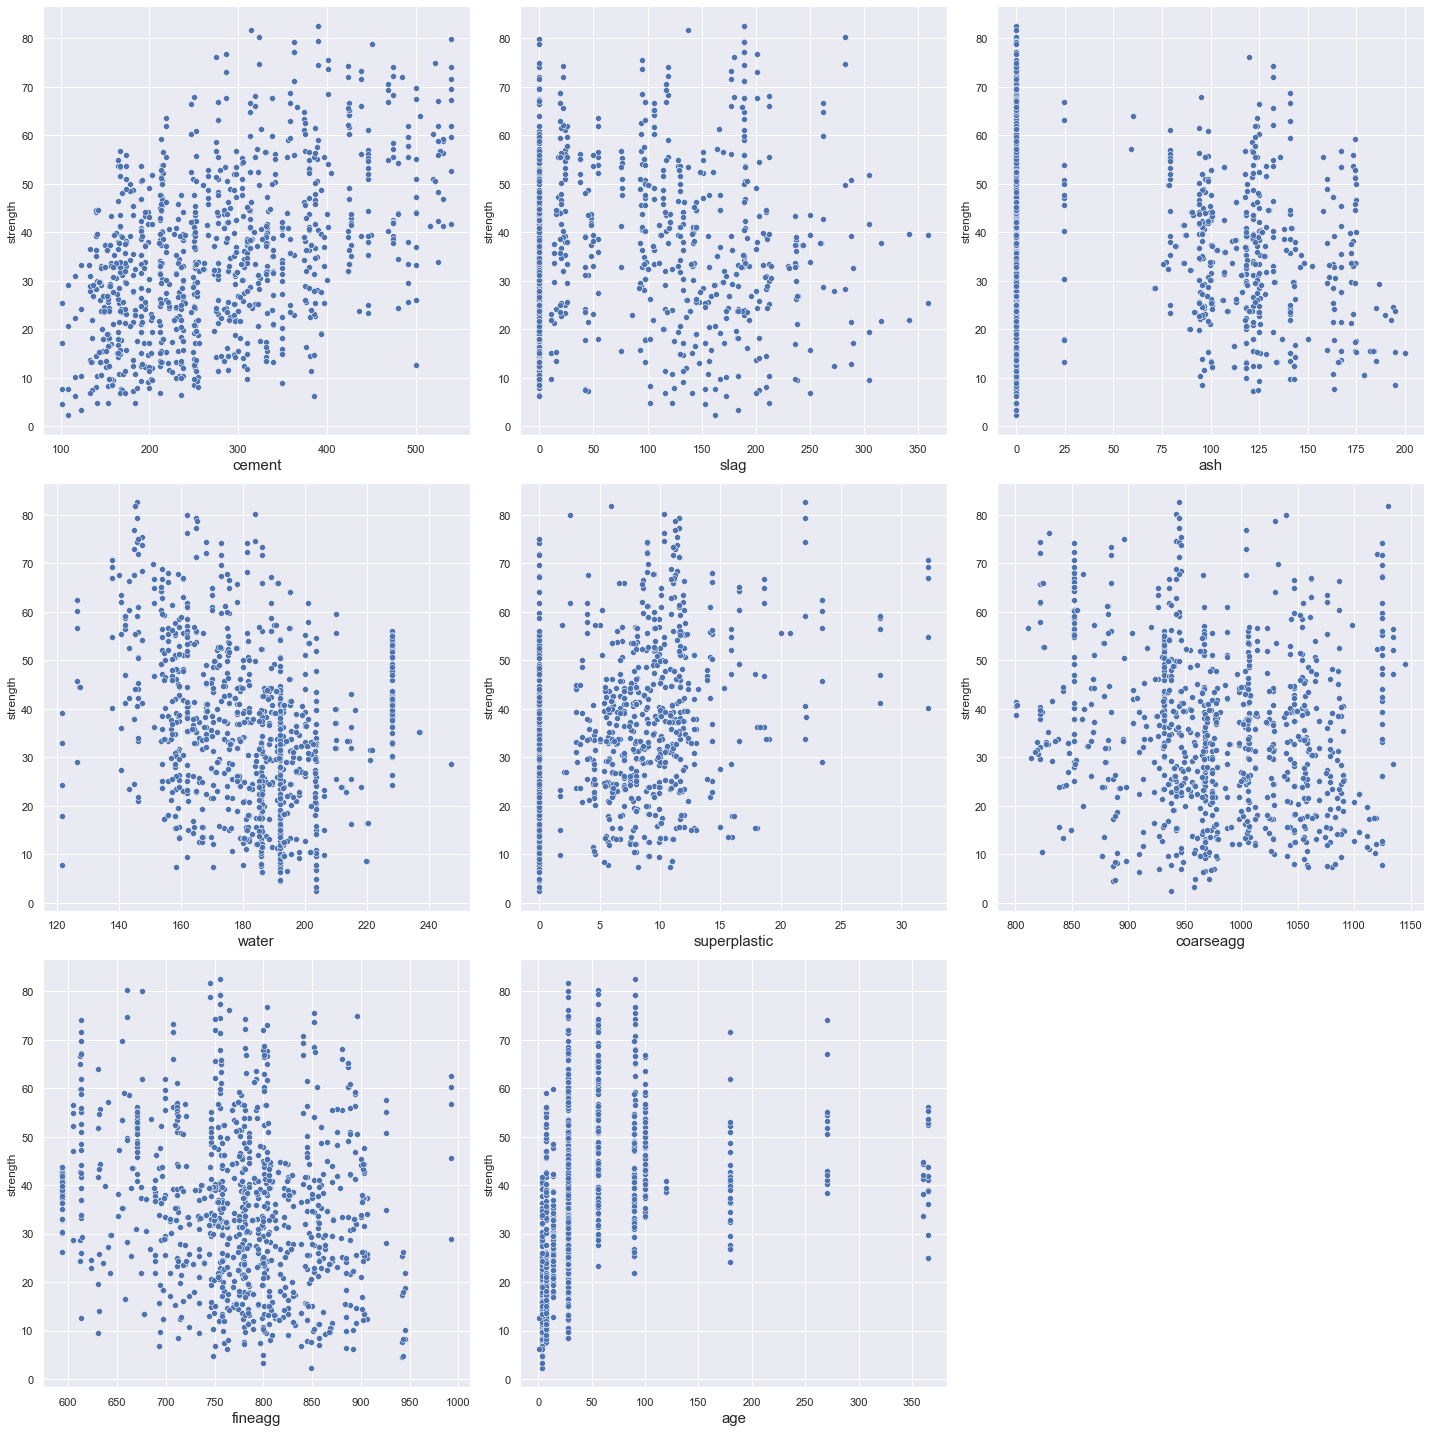

In [25]:
plt.figure(figsize = (20, 20))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.scatterplot(df[col], df[df.columns[-1]])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

# Data Cleaning :

## 1. Seperate data into dependent and independent Variables :

In [26]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

## 2. Variance on dependent Variable  :

In [27]:
print(np.asarray(X).var())
print(X.var())

124174.20346102008
cement          10921.742654
slag             7444.083725
ash              4095.548093
water             456.060245
superplastic       35.682602
coarseagg        6045.656228
fineagg          6428.099159
age              3990.437729
dtype: float64


## 3. Treating the high variance through log :

In [28]:
for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])

In [29]:
print(np.asarray(X).var())
print(X.var())

5.705329318662283
cement          0.143939
slag            5.816392
ash             5.641045
water           0.014066
superplastic    1.333888
coarseagg       0.006475
fineagg         0.011292
age             1.233057
dtype: float64


**Outcomes** 

1. The variance on original data was : 124174.20
2. The variance on data after log is : 5.7
3. We have decreased the variance significantly.

## 4. Distribution of independent variables after treating high variance

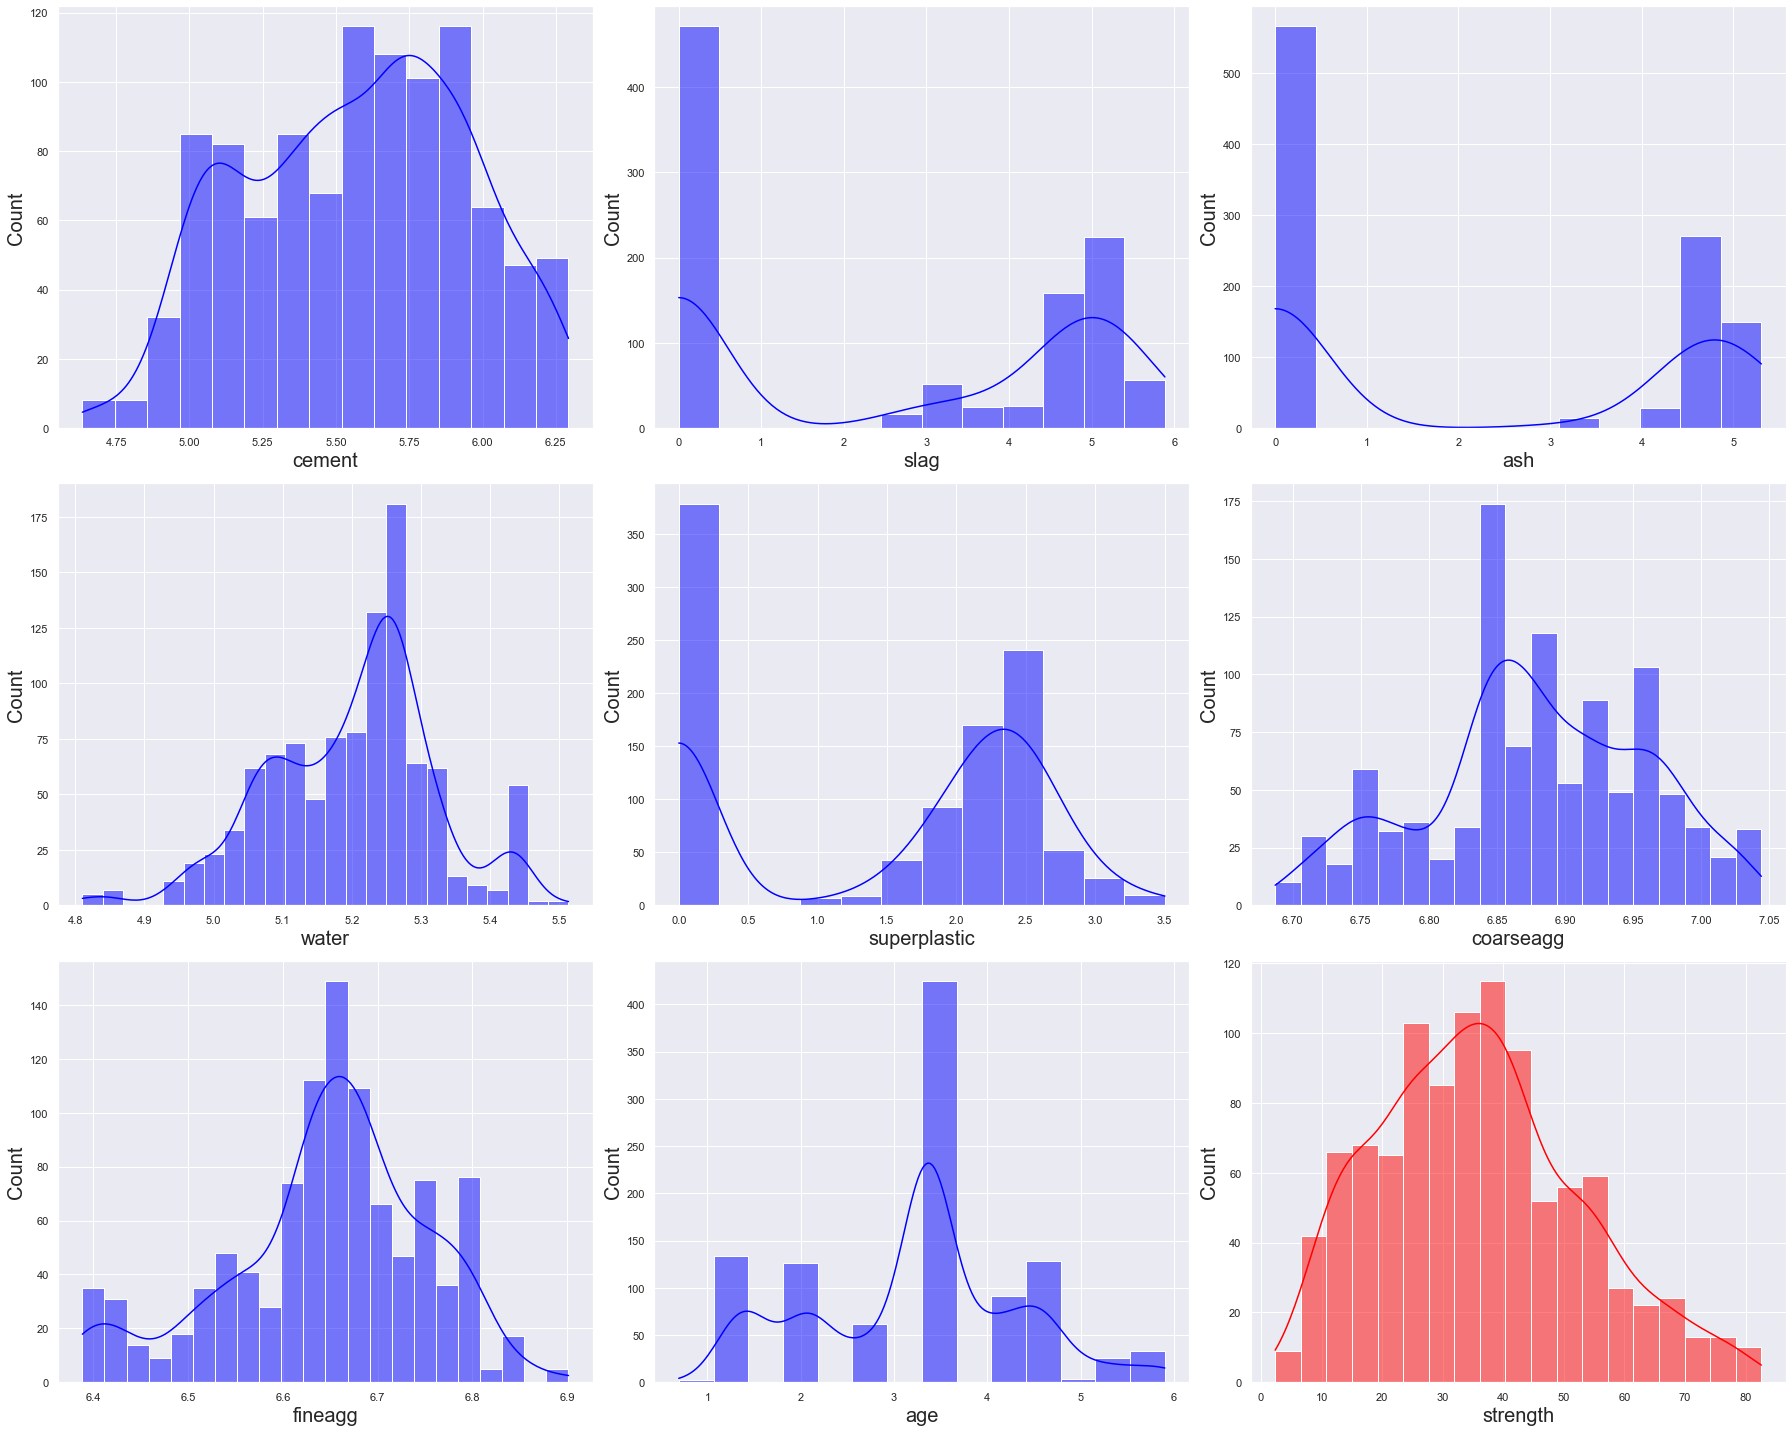

In [30]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        if plotnumber==9:
            sns.histplot(y,kde=True, color="red")
        else:
            sns.histplot(X[col],kde=True, color="blue")
        plt.xlabel(col, fontsize = 20)
        plt.ylabel("Count", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

## 5. Boxplot of independent variables after treating high variance

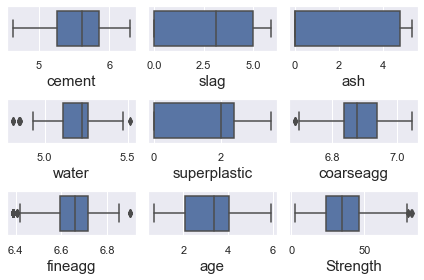

In [34]:
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
    
ax = plt.subplot(3, 3, plotnumber)
sns.boxplot(y)
plt.xlabel("Strength", fontsize = 15)
        
plt.tight_layout()
plt.show()

# Evaluators :

# General Code to predict and record the model performance

In [35]:
solution= []

In [36]:
def evaluate_regression(y_true, y_pred):
    # Calculate the evaluation metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    medae = median_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
#     adjusted_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - len(y_true[0]) - 1)
    explained_variance = explained_variance_score(y_true, y_pred)

    # Create a dictionary to store the evaluation metrics
    evaluation_metrics = {
        'Mean Squared Error (MSE)': mse,
        'Root Mean Squared Error (RMSE)': rmse,
        'Mean Absolute Error (MAE)': mae,
        'Mean Absolute Percentage Error (MAPE)': mape,
        'Median Absolute Error (MedAE)': medae,
        'R-squared (R2)': r2,
        'Explained Variance Score': explained_variance
    }
    
    solution.append(evaluation_metrics)
    return evaluation_metrics

In [37]:
models = [
    'linear',
    'linear2',
    'linear3',
    'ridge',
    'ridge2',
    'ridge3',
    'lasso',
    'lasso2',
    'lasso3',
    'knn',
    'svr',
    'dtree',
    'rf',
    'ada',
    'gbr',
    'xgb',]

In [38]:
def train_test_eval(solution):
    train_res = []
    test_res = []

    # Iterate through the solution list and models list
    for idx, sol in enumerate(solution):
        model_name = models[int(idx/2)]

        # Extract the metrics for the current model from the solution list
        model_metrics = {
            'Model': model_name,
            'MSE': sol['Mean Squared Error (MSE)'],
            'RMSE': sol['Root Mean Squared Error (RMSE)'],
            'MAE': sol['Mean Absolute Error (MAE)'],
            'MAPE': sol['Mean Absolute Percentage Error (MAPE)'],
            'MedAE': sol['Median Absolute Error (MedAE)'],
            'R-squared': sol['R-squared (R2)'],
            'Explained Variance': sol['Explained Variance Score']
        }

        if(idx%2==0):
            train_res.append(model_metrics)
        else:
            test_res.append(model_metrics)
            
    return [train_res,test_res]

**Outcomes** 

1. R-squared (R2) is the most important metric. The closer it is to one, than better the model is.
2. Error reports are also made (MSE,MAE,RMSE,MedAE,MAPE).
3. Every time the function is called, the results are added to the solution array.

### METHODS :

1. METHOD 1 (NO Pre-processing is performed on the data)
2. METHOD 2 (variance is decreased using log)
3. METHOD 3 (Outliers are removed)

# MODELS

# METHOD 1 (NO Pre-processing is performed on the data) :

In [39]:
solution= []

### StandardScaler applied to Data

In [40]:
sc = StandardScaler()

In [41]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Construction :

## Linear Regression, Polynomial Regression(deg 2), Polynomial Regression (deg 3)

In [42]:
linear = Pipeline(
steps=[
    ('model_lr',LinearRegression())
])

linear2 = Pipeline(
steps=[
    ('poly2',PolynomialFeatures(degree=2)),
    ('model_lr',LinearRegression())
])

linear3 = Pipeline(
steps=[
    ('poly3',PolynomialFeatures(degree=3)),
    ('model_lr',LinearRegression())
])

## Ridge Regression, Ridge Regression(deg 2), Ridge Regression (deg 3)

In [43]:
ridge = Pipeline(steps=[
    ('model_lr',Ridge(random_state=42))
])

ridge2 = Pipeline(
steps=[
    ('poly_ridge_2',PolynomialFeatures(degree=2)),
    ('model_lr',Ridge(random_state=42))
])

ridge3 = Pipeline(
steps=[
    ('poly_ridge_3',PolynomialFeatures(degree=3)),
    ('model_lr',Ridge(random_state=42))
])

## Lasso Regression, Lasso Regression(deg 2), Lasso Regression (deg 3)

In [44]:
lasso = Pipeline(
steps=[
    ('model_lr',Lasso())
])

lasso2 = Pipeline(
steps=[
    ('poly2',PolynomialFeatures(degree=2)),
    ('model_lr',Lasso())
])

lasso3 = Pipeline(
steps=[
    ('poly3',PolynomialFeatures(degree=3)),
    ('model_lr',Lasso())
])

## KNN, SVR, DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor, 

## GradientBoostingRegressor, XGBRegressor

In [45]:
knn = KNeighborsRegressor(n_neighbors=3)
svr = SVR(gamma='auto')
dtree = DecisionTreeRegressor(random_state=42, max_depth=4)
rf = RandomForestRegressor(random_state=42, max_depth=4)
ada  = AdaBoostRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42, max_depth=4)
xgb = XGBRegressor()

# 1. Linear Regression

In [46]:
linear.fit(X_train, y_train)
linear_train_res = evaluate_regression(y_train,linear.predict(X_train))
linear_test_res = evaluate_regression(y_test,linear.predict(X_test))

# 2. Polynomial Regression(deg 2)

In [47]:
linear2.fit(X_train, y_train)
linear2_train_res = evaluate_regression(y_train,linear2.predict(X_train))
linear2_test_res = evaluate_regression(y_test,linear2.predict(X_test))

# 3. Polynomial Regression (deg 3)

In [48]:
linear3.fit(X_train, y_train)
linear3_train_res = evaluate_regression(y_train,linear3.predict(X_train))
linear3_test_res = evaluate_regression(y_test,linear3.predict(X_test))

# 4.Ridge Regression

In [49]:
ridge.fit(X_train, y_train)
ridge_train_res = evaluate_regression(y_train,ridge.predict(X_train))
ridge_test_res = evaluate_regression(y_test,ridge.predict(X_test))

# 5. Ridge Regression(deg 2)

In [50]:
ridge2.fit(X_train, y_train)
ridge2_train_res = evaluate_regression(y_train,ridge2.predict(X_train))
ridge2_test_res = evaluate_regression(y_test,ridge2.predict(X_test))

# 6. Ridge Regression (deg 3)

In [51]:
ridge3.fit(X_train, y_train)
ridge3_train_res = evaluate_regression(y_train,ridge3.predict(X_train))
ridge3_test_res = evaluate_regression(y_test,ridge3.predict(X_test))

# 7. Lasso Regression

In [52]:
lasso.fit(X_train, y_train)
lasso_train_res = evaluate_regression(y_train,lasso.predict(X_train))
lasso_test_res = evaluate_regression(y_test,lasso.predict(X_test))

# 8. Lasso Regression(deg 2)

In [53]:
lasso2.fit(X_train, y_train)
lasso2_train_res = evaluate_regression(y_train,lasso2.predict(X_train))
lasso2_test_res = evaluate_regression(y_test,lasso2.predict(X_test))

# 9. Lasso Regression (deg 3)

In [54]:
lasso3.fit(X_train, y_train)
lasso3_train_res = evaluate_regression(y_train,lasso3.predict(X_train))
lasso3_test_res = evaluate_regression(y_test,lasso3.predict(X_test))

# 10. KNN

In [55]:
knn.fit(X_train, y_train)
knn_train_res = evaluate_regression(y_train,knn.predict(X_train))
knn_test_res = evaluate_regression(y_test,knn.predict(X_test))

# 11. SVR

In [56]:
svr.fit(X_train, y_train)
svr_train_res = evaluate_regression(y_train,svr.predict(X_train))
svr_test_res = evaluate_regression(y_test,svr.predict(X_test))

# 12. DecisionTreeRegressor

In [57]:
dtree.fit(X_train, y_train)
dtree_train_res = evaluate_regression(y_train,dtree.predict(X_train))
dtree_test_res = evaluate_regression(y_test,dtree.predict(X_test))

# 13. RandomForestRegressor

In [58]:
rf.fit(X_train, y_train)
rf_train_res = evaluate_regression(y_train,rf.predict(X_train))
rf_test_res = evaluate_regression(y_test,rf.predict(X_test))

# 14. AdaBoostRegressor

In [59]:
ada.fit(X_train, y_train)
ada_train_res = evaluate_regression(y_train,ada.predict(X_train))
ada_test_res = evaluate_regression(y_test,ada.predict(X_test))

# 15. GradientBoostingRegressor

In [60]:
gbr.fit(X_train, y_train)
gbr_train_res = evaluate_regression(y_train,gbr.predict(X_train))
gbr_test_res = evaluate_regression(y_test,gbr.predict(X_test))

# 16. XGBRegressor

In [61]:
xgb.fit(X_train, y_train)
xgb_train_res = evaluate_regression(y_train,xgb.predict(X_train))
xgb_test_res = evaluate_regression(y_test,xgb.predict(X_test))

In [62]:
len(solution)

32

**Outcomes** 

1. There are a total of 16 models trained and tested.
2. Therefore, the total solutions are 32 (16x2).

# Method 1 Result compilation :

In [63]:
train_res1,test_res1 =  train_test_eval(solution)

# Compiled Results for train and test dataset (Method 1)

In [64]:
train_res1 = pd.DataFrame(train_res1)
train_res1

,Model,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
0,linear,110.413891,10.507801,8.320994,31.723374,6.573039,0.622263,0.622263
1,linear2,90.168776,9.495724,7.354287,25.805321,5.796033,0.691523,0.691523
2,linear3,33.682723,5.803682,4.493278,16.693863,3.502362,0.884768,0.884768
3,ridge,110.422202,10.508197,8.325924,31.761831,6.563484,0.622234,0.622234
4,ridge2,53.157031,7.290887,5.582906,19.469727,4.558117,0.818144,0.818144
5,ridge3,20.353842,4.511523,3.520897,12.558928,2.986742,0.930367,0.930367
6,lasso,123.528827,11.114352,8.932679,36.462053,8.049270,0.577395,0.577395
7,lasso2,81.146559,9.008138,7.091849,28.088143,5.596913,0.722389,0.722389
8,lasso3,77.189056,8.785730,6.955434,27.583368,6.000624,0.735928,0.735928
9,knn,37.480610,6.122141,4.427425,17.132628,3.110686,0.871775,0.872299


In [65]:
test_res1 = pd.DataFrame(test_res1)
test_res1

,Model,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
0,linear,98.272557,9.913252,7.881235,29.570344,6.275124,0.585972,0.586020
1,linear2,97.788113,9.888787,7.761539,27.709181,6.439888,0.588013,0.589847
2,linear3,59.349654,7.703873,5.710847,20.976191,4.659813,0.749956,0.750075
3,ridge,98.207248,9.909957,7.890548,29.639489,6.263088,0.586247,0.586294
4,ridge2,54.834159,7.405009,5.757795,20.290458,4.869062,0.768980,0.769428
5,ridge3,33.959089,5.827443,4.337665,15.237821,3.252668,0.856928,0.857570
6,lasso,105.320237,10.262565,8.403787,34.520219,7.903212,0.556280,0.556594
7,lasso2,72.845235,8.534942,6.854593,28.068765,6.024787,0.693099,0.696085
8,lasso3,75.134830,8.668035,7.040947,28.896404,6.306226,0.683453,0.686099
9,knn,73.364283,8.565295,6.389736,23.515253,5.059490,0.690912,0.695146


# METHOD 2 (variance is decreased using log) : 

In [66]:
solution =[]

In [67]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Construction :

## Linear Regression, Polynomial Regression(deg 2), Polynomial Regression (deg 3)

In [69]:
linear_2 = Pipeline(
steps=[
    ('model_lr',LinearRegression())
])

linear2_2 = Pipeline(
steps=[
    ('poly2',PolynomialFeatures(degree=2)),
    ('model_lr',LinearRegression())
])

linear3_2 = Pipeline(
steps=[
    ('poly3',PolynomialFeatures(degree=3)),
    ('model_lr',LinearRegression())
])

## Ridge Regression, Ridge Regression(deg 2), Ridge Regression (deg 3)

In [70]:
ridge_2 = Pipeline(
steps=[
    ('model_lr',Ridge(random_state=42))
])

ridge2_2 = Pipeline(
steps=[
    ('poly_ridge_2',PolynomialFeatures(degree=2)),
    ('model_lr',Ridge(random_state=42))
])

ridge3_2 = Pipeline(
steps=[
    ('poly_ridge_3',PolynomialFeatures(degree=3)),
    ('model_lr',Ridge(random_state=42))
])

## Lasso Regression, Lasso Regression(deg 2), Lasso Regression (deg 3)

In [71]:
lasso_2 = Pipeline(
steps=[
    ('model_lr',Lasso())
])

lasso2_2 = Pipeline(
steps=[
    ('poly2',PolynomialFeatures(degree=2)),
    ('model_lr',Lasso())
])

lasso3_2 = Pipeline(
steps=[
    ('poly3',PolynomialFeatures(degree=3)),
    ('model_lr',Lasso())
])

## KNN, SVR, DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor, 

## GradientBoostingRegressor, XGBRegressor

In [72]:
knn_2 = KNeighborsRegressor(n_neighbors=3)
svr_2 = SVR(gamma='auto')
dtree_2 = DecisionTreeRegressor(random_state=42, max_depth=4)
rf_2 = RandomForestRegressor(random_state=42, max_depth=4)
ada_2  = AdaBoostRegressor(random_state=42)
gbr_2 = GradientBoostingRegressor(random_state=42, max_depth=4)
xgb_2 = XGBRegressor()

# 1. Linear Regression

In [73]:
linear_2.fit(X_train, y_train)
linear_2_train_res = evaluate_regression(y_train,linear_2.predict(X_train))
linear_2_test_res = evaluate_regression(y_test,linear_2.predict(X_test))

# 2. Polynomial Regression(deg 2)

In [74]:
linear2_2.fit(X_train, y_train)
linear2_2_train_res = evaluate_regression(y_train,linear2_2.predict(X_train))
linear2_2_test_res = evaluate_regression(y_test,linear2_2.predict(X_test))

# 3. Polynomial Regression (deg 3)

In [75]:
linear3_2.fit(X_train, y_train)
linear3_2_train_res = evaluate_regression(y_train,linear3_2.predict(X_train))
linear3_2_test_res = evaluate_regression(y_test,linear3_2.predict(X_test))

# 4.Ridge Regression

In [76]:
ridge_2.fit(X_train, y_train)
ridge_2_train_res = evaluate_regression(y_train,ridge_2.predict(X_train))
ridge_2_test_res = evaluate_regression(y_test,ridge_2.predict(X_test))

# 5. Ridge Regression(deg 2)

In [77]:
ridge2_2.fit(X_train, y_train)
ridge2_2_train_res = evaluate_regression(y_train,ridge2_2.predict(X_train))
ridge2_2_test_res = evaluate_regression(y_test,ridge2_2.predict(X_test))

# 6. Ridge Regression (deg 3)

In [78]:
ridge3_2.fit(X_train, y_train)
ridge3_2_train_res = evaluate_regression(y_train,ridge3_2.predict(X_train))
ridge3_2_test_res = evaluate_regression(y_test,ridge3_2.predict(X_test))

# 7. Lasso Regression

In [79]:
lasso_2.fit(X_train, y_train)
lasso_2_train_res = evaluate_regression(y_train,lasso_2.predict(X_train))
lasso_2_test_res = evaluate_regression(y_test,lasso_2.predict(X_test))

# 8. Lasso Regression(deg 2)

In [80]:
lasso2_2.fit(X_train, y_train)
lasso2_2_train_res = evaluate_regression(y_train,lasso2_2.predict(X_train))
lasso2_2_test_res = evaluate_regression(y_test,lasso2_2.predict(X_test))

# 9. Lasso Regression (deg 3)

In [81]:
lasso3_2.fit(X_train, y_train)
lasso3_2_train_res = evaluate_regression(y_train,lasso3_2.predict(X_train))
lasso3_2_test_res = evaluate_regression(y_test,lasso3_2.predict(X_test))

# 10. KNN

In [82]:
knn_2.fit(X_train, y_train)
knn_2_train_res = evaluate_regression(y_train,knn_2.predict(X_train))
knn_2_test_res = evaluate_regression(y_test,knn_2.predict(X_test))

# 11. SVR

In [83]:
svr_2.fit(X_train, y_train)
svr_2_train_res = evaluate_regression(y_train,svr_2.predict(X_train))
svr_2_test_res = evaluate_regression(y_test,svr_2.predict(X_test))

# 12. DecisionTreeRegressor

In [84]:
dtree_2.fit(X_train, y_train)
dtree_2_train_res = evaluate_regression(y_train,dtree_2.predict(X_train))
dtree_2_test_res = evaluate_regression(y_test,dtree_2.predict(X_test))

# 13. RandomForestRegressor

In [85]:
rf_2.fit(X_train, y_train)
rf_2_train_res = evaluate_regression(y_train,rf_2.predict(X_train))
rf_2_test_res = evaluate_regression(y_test,rf_2.predict(X_test))

# 14. AdaBoostRegressor

In [86]:
ada_2.fit(X_train, y_train)
ada_2_train_res = evaluate_regression(y_train,ada_2.predict(X_train))
ada_2_test_res = evaluate_regression(y_test,ada_2.predict(X_test))

# 15. GradientBoostingRegressor

In [87]:
gbr_2.fit(X_train, y_train)
gbr_2_train_res = evaluate_regression(y_train,gbr_2.predict(X_train))
gbr_2_test_res = evaluate_regression(y_test,gbr_2.predict(X_test))

# 16. XGBRegressor

In [88]:
xgb_2.fit(X_train, y_train)
xgb_2_train_res = evaluate_regression(y_train,xgb_2.predict(X_train))
xgb_2_test_res = evaluate_regression(y_test,xgb_2.predict(X_test))

In [89]:
len(solution)

32

**Outcomes** 

1. There are a total of 16 models trained and tested.
2. Therefore, the total solutions are 32 (16x2).

# Method 2 Result compilation :

In [90]:
train_res2, test_res2 = train_test_eval(solution)

# Compiled Results for train and test dataset (Method 2)

In [91]:
train_res2 = pd.DataFrame(train_res2)
train_res2

,Model,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
0,linear,52.873017,7.271383,5.634338,19.343696,4.438459,0.808975,0.808975
1,linear2,30.833484,5.552791,4.224153,13.499782,3.262328,0.888602,0.888602
2,linear3,13.544856,3.680334,2.782671,9.598946,2.277195,0.951064,0.951064
3,ridge,52.873857,7.271441,5.635115,19.345632,4.457600,0.808972,0.808972
4,ridge2,30.897236,5.558528,4.240457,13.559764,3.318568,0.888371,0.888371
5,ridge3,14.419989,3.797366,2.864673,9.903639,2.335390,0.947902,0.947902
6,lasso,58.959739,7.678525,5.968526,20.633666,4.742363,0.786984,0.786984
7,lasso2,55.522459,7.451339,5.867265,20.324378,4.925162,0.799403,0.799403
8,lasso3,50.066888,7.075796,5.586332,19.789302,4.700511,0.819113,0.819113
9,knn,17.134777,4.139417,2.950352,10.028887,2.182192,0.938094,0.938095


In [92]:
test_res2 = pd.DataFrame(test_res2)
test_res2

,Model,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
0,linear,61.922794,7.869104,6.016515,21.443951,4.689569,0.782508,0.783137
1,linear2,36.255850,6.021283,4.491876,15.045010,3.256265,0.872658,0.874835
2,linear3,109.433989,10.461070,4.450282,14.169640,2.548749,0.615633,0.616400
3,ridge,61.866552,7.865529,6.012375,21.409562,4.688835,0.782705,0.783341
4,ridge2,36.659619,6.054719,4.500900,15.029934,3.289775,0.871240,0.873482
5,ridge3,48.705472,6.978931,3.986355,13.737529,2.771345,0.828931,0.828977
6,lasso,64.791116,8.049293,6.124116,20.917721,4.581784,0.772433,0.773023
7,lasso2,60.688510,7.790283,6.012156,20.555293,4.830515,0.786843,0.788165
8,lasso3,57.316444,7.570762,5.905659,22.423121,4.612775,0.798687,0.799817
9,knn,41.014826,6.404282,4.654459,16.910140,3.343269,0.855943,0.856137


**Outcomes** 

1. Overall performance has increased compared to test_res1

# METHOD 3 (Outliers are removed)

In [93]:
solution =[]

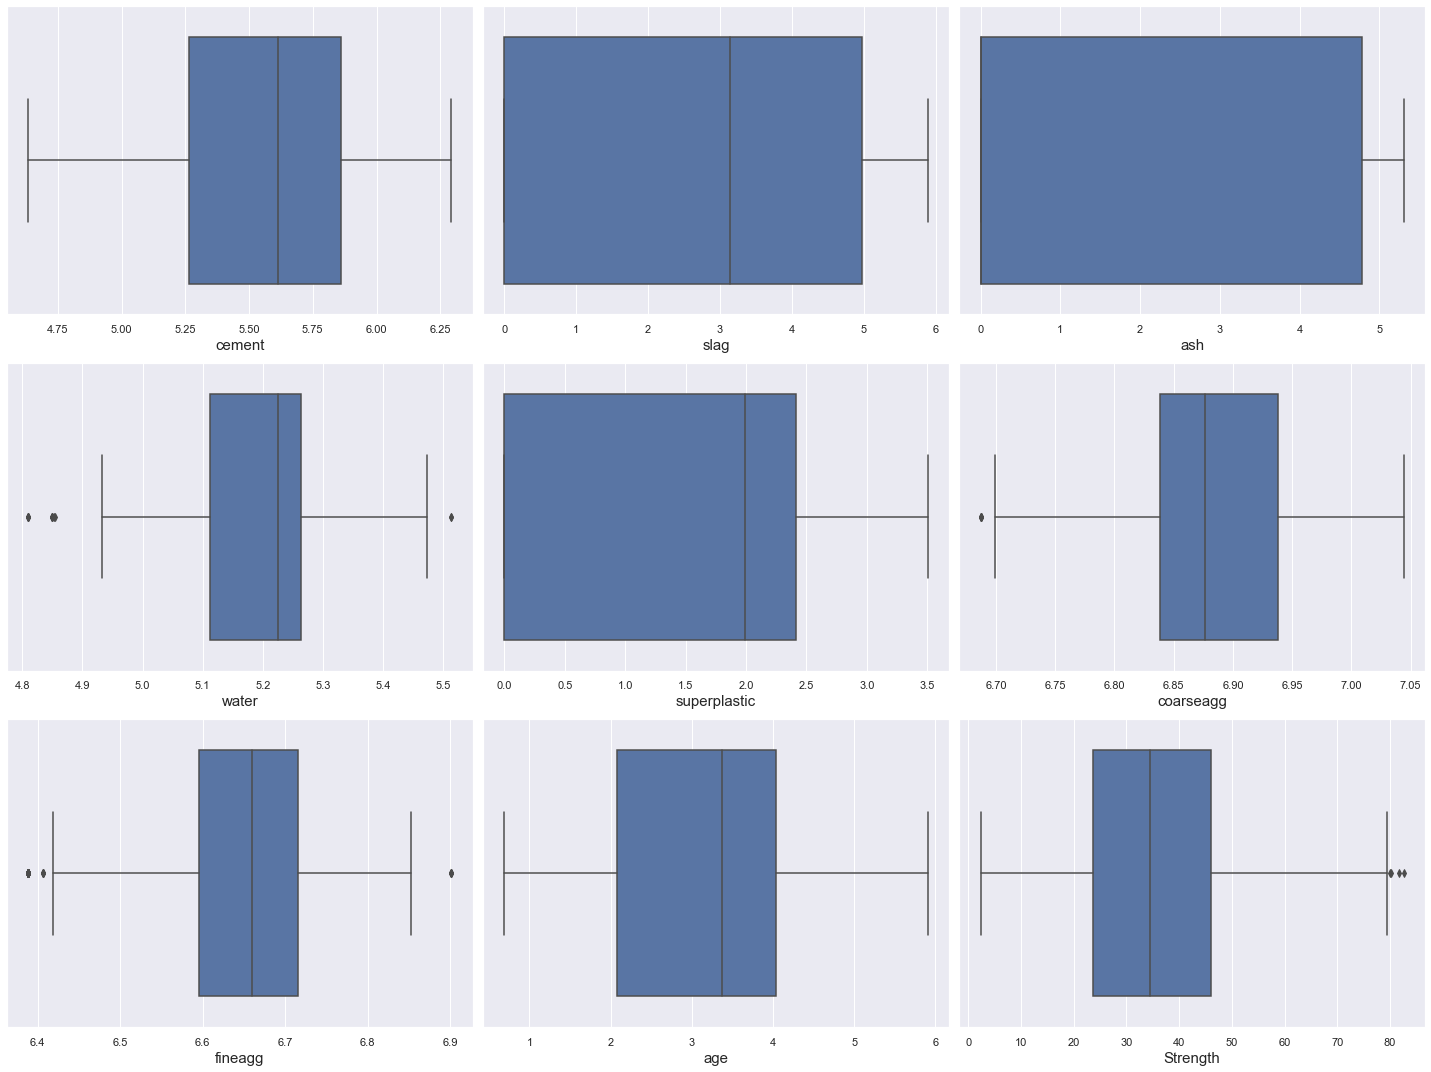

In [94]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
    
ax = plt.subplot(3, 3, plotnumber)
sns.boxplot(y)
plt.xlabel("Strength", fontsize = 15)
        
plt.tight_layout()
plt.show()

**Outcomes** 

1. As we can see, there are still some outliers.

In [95]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Outlier %:

In [96]:
# Count outliers
q1= data.quantile(0.25)
q3= data.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((X > (q3+1.5*IQR)) | (X < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(X), 2)
outliers

,No. of outliers,Percentage of outliers
age,59,5.73
ash,0,0.00
cement,0,0.00
coarseagg,0,0.00
fineagg,5,0.49
slag,2,0.19
strength,0,0.00
superplastic,10,0.97
water,9,0.87


**Outcomes** 

1. No. of outliers and Percentage of outliers per column
2. There are 59 , 10 and 9 outliers from age , superplastic and water

# Class that takes SimpleImputer class to compute Outliers

In [97]:
class OutliersImputer(SimpleImputer):
    '''
    This class extends the functionality of SimpleImputer to handle outliers.
    '''
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        super().__init__(strategy=strategy)

    def fit(self, X, y=None):
        for i in X.columns:
            q1, q2, q3 = X[i].quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = X[i] > q3 + 1.5*IQR
            b = X[i] < q1 - 1.5*IQR
            X[i] = np.where(a | b, np.NaN, X[i])  
        return super().fit(X, y)

**Outcomes** 

1. Remove all that are below q1 - 1.5*IQR and above q3 + 1.5*IQR

# Removing Outliers

In [98]:
X[['age','superplastic','water']] = OutliersImputer().fit_transform(X[['age','superplastic','water']])

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Construction :

## Linear Regression, Polynomial Regression(deg 2), Polynomial Regression (deg 3)

In [100]:
linear_3 = Pipeline(
steps=[
    ('model_lr',LinearRegression())
])

linear2_3 = Pipeline(
steps=[
    ('poly2',PolynomialFeatures(degree=2)),
    ('model_lr',LinearRegression())
])

linear3_3 = Pipeline(
steps=[
    ('poly3',PolynomialFeatures(degree=3)),
    ('model_lr',LinearRegression())
])

## Ridge Regression, Ridge Regression(deg 2), Ridge Regression (deg 3)

In [101]:
ridge_3 = Pipeline(
steps=[
    ('model_lr',Ridge(random_state=42))
])

ridge2_3 = Pipeline(
steps=[
    ('poly_ridge_2',PolynomialFeatures(degree=2)),
    ('model_lr',Ridge(random_state=42))
])

ridge3_3 = Pipeline(
steps=[
    ('poly_ridge_3',PolynomialFeatures(degree=3)),
    ('model_lr',Ridge(random_state=42))
])

## Lasso Regression, Lasso Regression(deg 2), Lasso Regression (deg 3)

In [102]:
lasso_3 = Pipeline(
steps=[
    ('model_lr',Lasso())
])

lasso2_3 = Pipeline(
steps=[
    ('poly2',PolynomialFeatures(degree=2)),
    ('model_lr',Lasso())
])

lasso3_3 = Pipeline(
steps=[
    ('poly3',PolynomialFeatures(degree=3)),
    ('model_lr',Lasso())
])

## KNN, SVR, DecisionTreeRegressor, RandomForestRegressor, AdaBoostRegressor, 

## GradientBoostingRegressor, XGBRegressor

In [103]:
knn_3 = KNeighborsRegressor(n_neighbors=3)
svr_3 = SVR(gamma='auto')
dtree_3 = DecisionTreeRegressor(random_state=42, max_depth=4)
rf_3 = RandomForestRegressor(random_state=42, max_depth=4)
ada_3  = AdaBoostRegressor(random_state=42)
gbr_3 = GradientBoostingRegressor(random_state=42, max_depth=4)
xgb_3 = XGBRegressor()

# 1. Linear Regression

In [104]:
linear_3.fit(X_train, y_train)
linear_3_train_res = evaluate_regression(y_train,linear_3.predict(X_train))
linear_3_test_res = evaluate_regression(y_test,linear_3.predict(X_test))

# 2. Polynomial Regression(deg 2)

In [105]:
linear2_3.fit(X_train, y_train)
linear2_3_train_res = evaluate_regression(y_train,linear2_3.predict(X_train))
linear2_3_test_res = evaluate_regression(y_test,linear2_3.predict(X_test))

# 3. Polynomial Regression (deg 3)

In [106]:
linear3_3.fit(X_train, y_train)
linear3_3_train_res = evaluate_regression(y_train,linear3_3.predict(X_train))
linear3_3_test_res = evaluate_regression(y_test,linear3_3.predict(X_test))

# 4.Ridge Regression

In [107]:
ridge_3.fit(X_train, y_train)
ridge_3_train_res = evaluate_regression(y_train,ridge_3.predict(X_train))
ridge_3_test_res = evaluate_regression(y_test,ridge_3.predict(X_test))

# 5. Ridge Regression(deg 2)

In [108]:
ridge2_3.fit(X_train, y_train)
ridge2_3_train_res = evaluate_regression(y_train,ridge2_3.predict(X_train))
ridge2_3_test_res = evaluate_regression(y_test,ridge2_3.predict(X_test))

# 6. Ridge Regression (deg 3)

In [109]:
ridge3_3.fit(X_train, y_train)
ridge3_3_train_res = evaluate_regression(y_train,ridge3_3.predict(X_train))
ridge3_3_test_res = evaluate_regression(y_test,ridge3_3.predict(X_test))

# 7. Lasso Regression

In [110]:
lasso_3.fit(X_train, y_train)
lasso_3_train_res = evaluate_regression(y_train,lasso_3.predict(X_train))
lasso_3_test_res = evaluate_regression(y_test,lasso_3.predict(X_test))

# 8. Lasso Regression(deg 2)

In [111]:
lasso2_3.fit(X_train, y_train)
lasso2_3_train_res = evaluate_regression(y_train,lasso2_3.predict(X_train))
lasso2_3_test_res = evaluate_regression(y_test,lasso2_3.predict(X_test))

# 9. Lasso Regression (deg 3)

In [112]:
lasso3_3.fit(X_train, y_train)
lasso3_3_train_res = evaluate_regression(y_train,lasso3_3.predict(X_train))
lasso3_3_test_res = evaluate_regression(y_test,lasso3_3.predict(X_test))

# 10. KNN

In [113]:
knn_3.fit(X_train, y_train)
knn_3_train_res = evaluate_regression(y_train,knn_3.predict(X_train))
knn_3_test_res = evaluate_regression(y_test,knn_3.predict(X_test))

# 11. SVR

In [114]:
svr_3.fit(X_train, y_train)
svr_3_train_res = evaluate_regression(y_train,svr_3.predict(X_train))
svr_3_test_res = evaluate_regression(y_test,svr_3.predict(X_test))

# 12. DecisionTreeRegressor

In [115]:
dtree_3.fit(X_train, y_train)
dtree_3_train_res = evaluate_regression(y_train,dtree_3.predict(X_train))
dtree_3_test_res = evaluate_regression(y_test,dtree_3.predict(X_test))

# 13. RandomForestRegressor

In [116]:
rf_3.fit(X_train, y_train)
rf_3_train_res = evaluate_regression(y_train,rf_3.predict(X_train))
rf_3_test_res = evaluate_regression(y_test,rf_3.predict(X_test))

# 14. AdaBoostRegressor

In [117]:
ada_3.fit(X_train, y_train)
ada_3_train_res = evaluate_regression(y_train,ada_3.predict(X_train))
ada_3_test_res = evaluate_regression(y_test,ada_3.predict(X_test))

# 15. GradientBoostingRegressor

In [118]:
gbr_3.fit(X_train, y_train)
gbr_3_train_res = evaluate_regression(y_train,gbr_3.predict(X_train))
gbr_3_test_res = evaluate_regression(y_test,gbr_3.predict(X_test))

# 16. XGBRegressor

In [119]:
xgb_3.fit(X_train, y_train)
xgb_3_train_res = evaluate_regression(y_train,xgb_3.predict(X_train))
xgb_3_test_res = evaluate_regression(y_test,xgb_3.predict(X_test))

In [120]:
len(solution)

32

**Outcomes** 

1. There are a total of 16 models trained and tested.
2. Therefore, the total solutions are 32 (16x2).

# Method 3 Result compilation :

In [121]:
train_res3, test_res3 = train_test_eval(solution)

# Compiled Results for train and test dataset (Method 3)

In [122]:
train_res3 = pd.DataFrame(train_res3)
train_res3

,Model,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
0,linear,75.343338,8.680054,6.667648,23.822045,5.271374,0.717809,0.717809
1,linear2,37.207227,6.099773,4.787487,15.872022,3.881105,0.860644,0.860644
2,linear3,17.113569,4.136855,3.188498,11.117210,2.606525,0.935903,0.935903
3,ridge,75.344370,8.680113,6.668958,23.850596,5.271952,0.717805,0.717805
4,ridge2,37.239352,6.102405,4.784467,15.855411,3.926212,0.860524,0.860524
5,ridge3,18.000756,4.242730,3.276276,11.378850,2.600412,0.932580,0.932580
6,lasso,83.311672,9.127523,7.150530,27.919537,5.920368,0.687965,0.687965
7,lasso2,60.864471,7.801568,6.142583,23.075356,4.981918,0.772038,0.772038
8,lasso3,55.914923,7.477628,5.921126,21.938565,4.943565,0.790576,0.790576
9,knn,25.873402,5.086590,3.669253,12.759582,2.706768,0.903094,0.903184


In [123]:
test_res3 = pd.DataFrame(test_res3)
test_res3

,Model,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
0,linear,82.498383,9.082862,6.958858,25.938638,5.208402,0.737354,0.737359
1,linear2,44.434851,6.665947,4.971760,17.461179,3.870729,0.858535,0.858639
2,linear3,33.404822,5.779691,3.963292,15.074065,2.851898,0.893651,0.893658
3,ridge,82.577485,9.087215,6.964604,25.981764,5.228206,0.737102,0.737106
4,ridge2,44.428803,6.665493,4.953578,17.382008,3.834094,0.858554,0.858700
5,ridge3,29.542308,5.435284,3.992046,14.840361,3.128128,0.905948,0.905986
6,lasso,92.369370,9.610898,7.478809,31.010235,6.218434,0.705928,0.705938
7,lasso2,69.371231,8.328939,6.278073,24.537977,4.824228,0.779146,0.779253
8,lasso3,62.490840,7.905115,5.909292,22.298446,4.394001,0.801051,0.801107
9,knn,60.961704,7.807798,5.694344,20.243226,4.339332,0.805919,0.808622


# Comparing Methods :

### Method 1 Description

In [124]:
test_res1.describe()

,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,68.081250,8.063826,6.291210,24.023394,5.255925,0.713170,0.715259
std,26.736243,1.805460,1.636058,6.882374,1.644677,0.112641,0.113121
min,19.153481,4.376469,2.790757,10.250319,1.660047,0.556280,0.556594
25%,55.777862,7.468368,5.746058,20.804757,4.816750,0.627473,0.628075
50%,73.104759,8.550119,6.533538,25.128364,5.608719,0.692005,0.695615
75%,88.422008,9.399046,7.521869,29.064889,6.282900,0.765005,0.772261
max,105.320237,10.262565,8.403787,34.520219,7.903212,0.919305,0.920126


### Method 2 Description

In [125]:
test_res2.describe()

,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,54.520751,7.232669,5.188692,19.049348,3.950143,0.808506,0.809793
std,22.223282,1.535100,1.221511,5.362504,1.276309,0.078055,0.078012
min,18.840243,4.340535,2.772618,10.632464,1.680551,0.615633,0.616400
25%,39.926024,6.316891,4.481478,14.814861,3.135035,0.782398,0.783290
50%,56.827363,7.538323,5.574170,20.736507,4.205837,0.800404,0.802996
75%,61.954127,7.871094,6.013410,21.684669,4.689019,0.859767,0.860474
max,109.433989,10.461070,7.178171,29.732830,6.286201,0.933827,0.933953


### Method 3 Description

In [126]:
test_res3.describe()

,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,60.613874,7.591976,5.712211,21.856576,4.427926,0.807027,0.807976
std,26.105124,1.781615,1.495677,6.729045,1.285587,0.083110,0.082765
min,19.797449,4.449432,3.005589,10.408936,1.975760,0.672410,0.672906
25%,41.672808,6.444043,4.713195,16.805022,3.657603,0.737291,0.737296
50%,62.177233,7.885229,6.068628,23.150388,4.526297,0.802050,0.804865
75%,82.518158,9.083950,6.960294,26.583424,5.321108,0.867328,0.867439
max,102.897786,10.143855,7.777296,31.048390,6.218434,0.936972,0.936981


**Outcomes** 

1. Method 3 and Method 2 produce almost similar results with the mean R-squared values being almost equal.
2. All the metrics seem to improve from method 1 when upgraded to method 2/3.

# Top 5 Performers in each Method

### Top 5 (Method1)

In [127]:
test_res1.sort_values(by='R-squared', ascending=False).head()

,Model,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
15,xgb,19.153481,4.376469,2.790757,10.250319,1.660047,0.919305,0.920126
14,gbr,21.647806,4.652720,3.230425,11.627437,2.303938,0.908797,0.909038
5,ridge3,33.959089,5.827443,4.337665,15.237821,3.252668,0.856928,0.857570
4,ridge2,54.834159,7.405009,5.757795,20.290458,4.869062,0.768980,0.769428
13,ada,56.092430,7.489488,6.163596,26.230669,5.794433,0.763679,0.780760


### Top 5 (Method2)

In [128]:
test_res2.sort_values(by='R-squared', ascending=False).head()

,Model,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
15,xgb,18.840243,4.340535,2.772618,10.632464,1.680551,0.933827,0.933953
14,gbr,20.874472,4.568859,3.239526,12.077368,2.354634,0.926682,0.927048
1,linear2,36.255850,6.021283,4.491876,15.045010,3.256265,0.872658,0.874835
4,ridge2,36.659619,6.054719,4.500900,15.029934,3.289775,0.871240,0.873482
9,knn,41.014826,6.404282,4.654459,16.910140,3.343269,0.855943,0.856137


### Top 5 (Method3)

In [129]:
test_res3.sort_values(by='R-squared', ascending=False).head()

,Model,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
15,xgb,19.797449,4.449432,3.005589,10.408936,1.975760,0.936972,0.936981
14,gbr,23.154146,4.811875,3.513605,11.857791,2.715561,0.926285,0.926420
5,ridge3,29.542308,5.435284,3.992046,14.840361,3.128128,0.905948,0.905986
2,linear3,33.404822,5.779691,3.963292,15.074065,2.851898,0.893651,0.893658
4,ridge2,44.428803,6.665493,4.953578,17.382008,3.834094,0.858554,0.858700


**Outcomes** 

1. Best performer : xgboost in all three methods. 
2. From the given data, it is obvious that xgb and gbr does not need any pre-processing like the other models to perform better.
3. Performance of all the models improved after scaling the data.

# Model Comparision of r^2 value among all three methods

In [130]:
tmp = pd.DataFrame()

tmp["Model"]=test_res2['Model']
tmp["R1"]=test_res1['R-squared']
tmp["R2"]=test_res2['R-squared']
tmp["R3"]=test_res3['R-squared']
tmp

,Model,R1,R2,R3
0,linear,0.585972,0.782508,0.737354
1,linear2,0.588013,0.872658,0.858535
2,linear3,0.749956,0.615633,0.893651
3,ridge,0.586247,0.782705,0.737102
4,ridge2,0.768980,0.871240,0.858554
5,ridge3,0.856928,0.828931,0.905948
6,lasso,0.556280,0.772433,0.705928
7,lasso2,0.693099,0.786843,0.779146
8,lasso3,0.683453,0.798687,0.801051
9,knn,0.690912,0.855943,0.805919


# Plot Comparision of Models

In [131]:
def plot_model_version(col):
    tmp = pd.DataFrame()

    tmp[col]=test_res1[col]
    tmp[col+" 2"]=test_res2[col]
    tmp[col+" 3"]=test_res3[col]

    plt.figure(figsize=(12, 6))
    ax = tmp.plot(kind='bar', ax=plt.gca(), width=0.7)
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45, ha='right')
    plt.xlabel('Model')
    plt.ylabel(col)
    plt.title(f'Bar Plot of {col} of Models from Method 1,2 and 3')
    plt.legend(title='Bins', labels=['R1', 'R2', 'R3'])
    plt.tight_layout()
    plt.show()

## Bar plot of Models from Method 1,2 and 3 Comparing the evaluation metrics

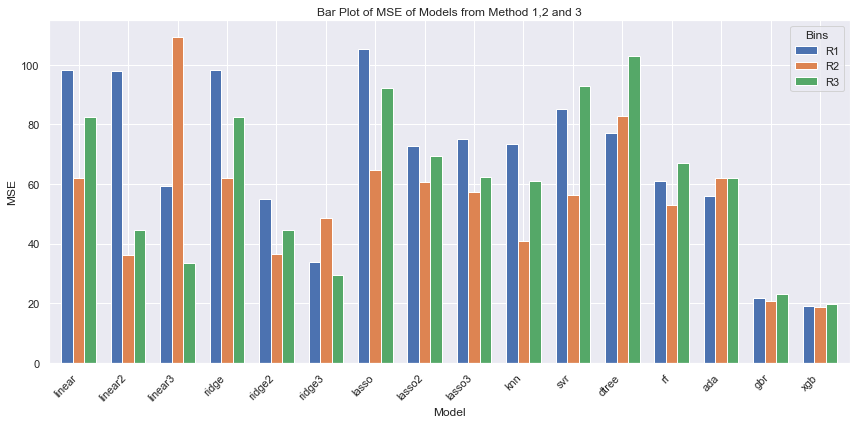

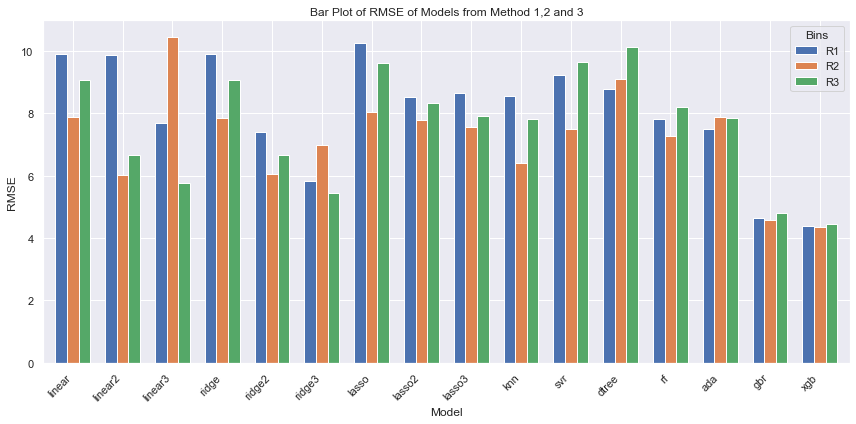

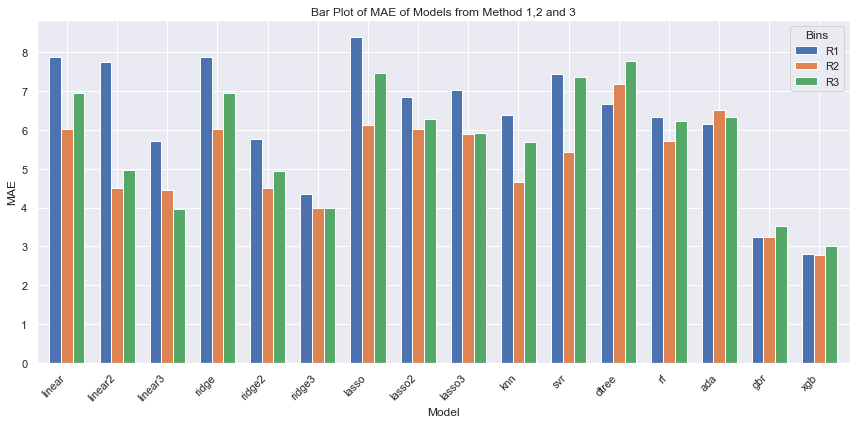

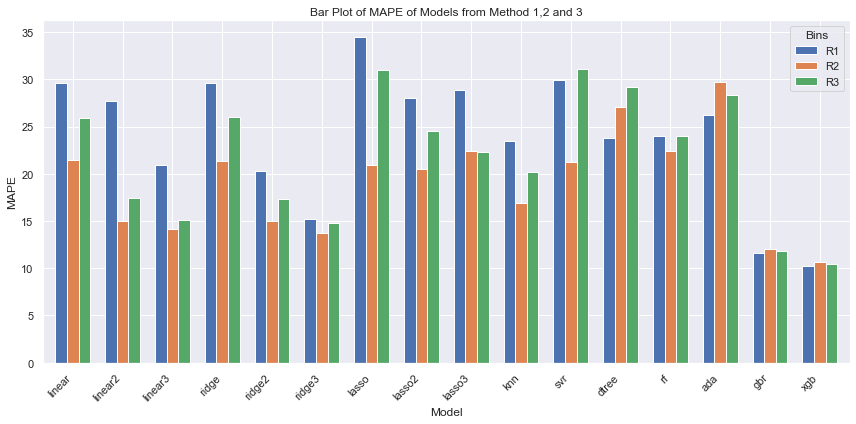

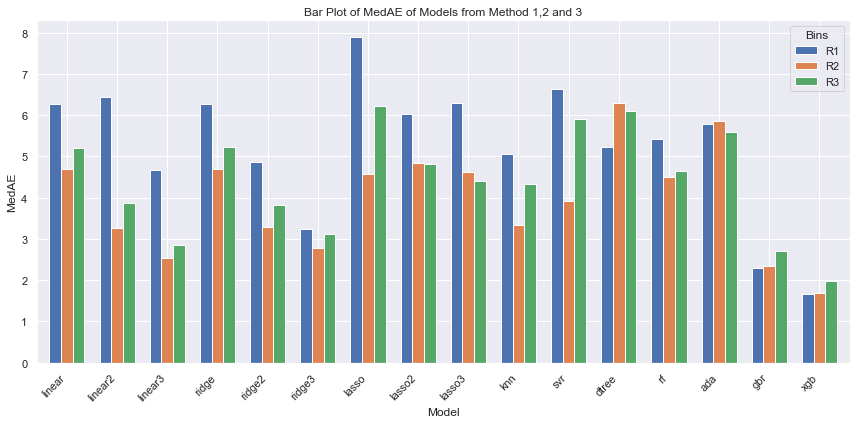

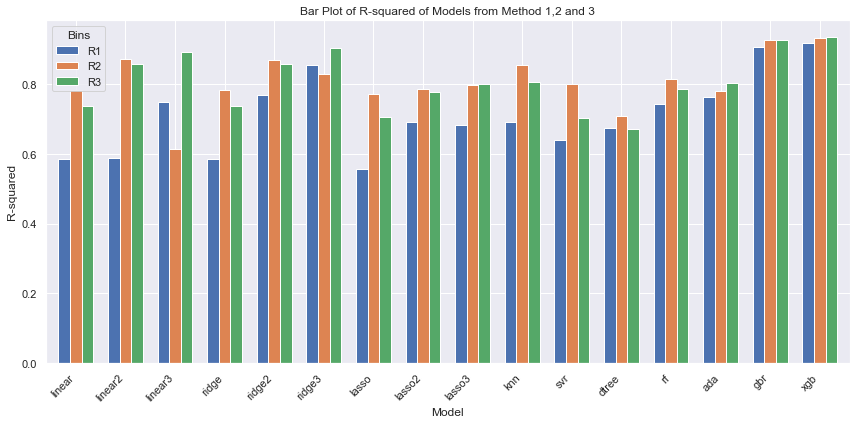

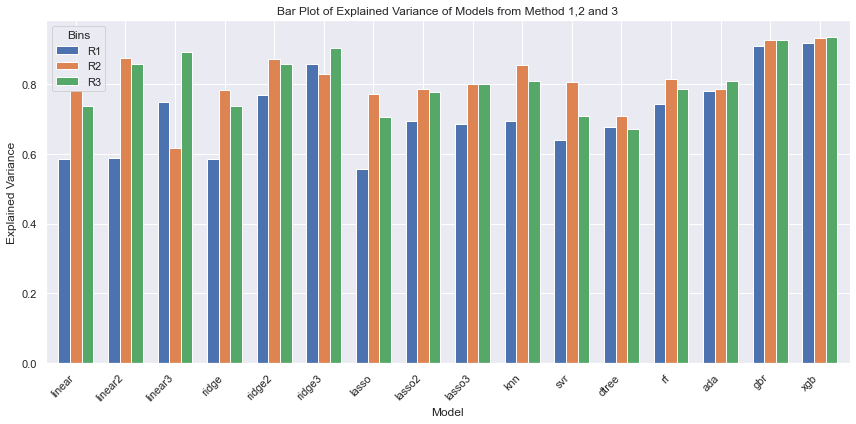

In [132]:
for col in test_res1.columns[1:]:
    plot_model_version(col)

### Conclusion :
1. Overall best performer is xgboost.
2. If boosting is not preferred, then the 5 models using method 2 in the below order can be used as they produce R-squared values > 0.80

In [133]:
test_res2.sort_values(by='R-squared', ascending=False).head(7)[2:]

,Model,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
1,linear2,36.255850,6.021283,4.491876,15.045010,3.256265,0.872658,0.874835
4,ridge2,36.659619,6.054719,4.500900,15.029934,3.289775,0.871240,0.873482
9,knn,41.014826,6.404282,4.654459,16.910140,3.343269,0.855943,0.856137
5,ridge3,48.705472,6.978931,3.986355,13.737529,2.771345,0.828931,0.828977
12,rf,52.845647,7.269501,5.708403,22.406824,4.498570,0.814389,0.815110


3. If boosting is not preferred, then the 5 models using method 3 in the below order can be used as they produce R-squared values > 0.80

In [134]:
test_res3.sort_values(by='R-squared', ascending=False).head(7)[2:]

,Model,MSE,RMSE,MAE,MAPE,MedAE,R-squared,Explained Variance
5,ridge3,29.542308,5.435284,3.992046,14.840361,3.128128,0.905948,0.905986
2,linear3,33.404822,5.779691,3.963292,15.074065,2.851898,0.893651,0.893658
4,ridge2,44.428803,6.665493,4.953578,17.382008,3.834094,0.858554,0.858700
1,linear2,44.434851,6.665947,4.971760,17.461179,3.870729,0.858535,0.858639
9,knn,60.961704,7.807798,5.694344,20.243226,4.339332,0.805919,0.808622


4. If boosting is not preferred, then only risso with degree 3 from method 1 can be used.